<a href="https://colab.research.google.com/github/sbbzplt/QiskitFallFest_IZTECH/blob/master/Adder_and_counting_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit
!pip install pylatexenc


$ \newcommand{\ket}[1]{|#1\rangle} $

# Adder and Counting

In [5]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute


## Half Adder
The half adder is used to add together the two least significant digits in a binary sum.
It has two single binary inputs, called A and B, and two outputs C(carry out) and S(sum).
The output C will be used as an input to the Full Adder, which will be explained later, for obtaining the value in the higher digit.

Half adders can be described with the truth table shown below.

|A(input)|B(input)|S(sum)|C(carry out)|
|-----------|------------|------------|------------|
|0|0|0|0|
|0|1|1|0|
|1|0|1|0|
|1|1|0|1|

From the truth table, you should notice that the carry output C is a result of operating an AND gate against A and B、where the output S is a result of operating an XOR against A and B.
As we have already created the AND and XOR gates, we can combine these gates and create a half adder as follows.

We denote our quantum register as 'q', classical registers as 'c', assign inputs A, B to q[0], q[1], the sum output S and  carry output C to q[2] and q[3]."

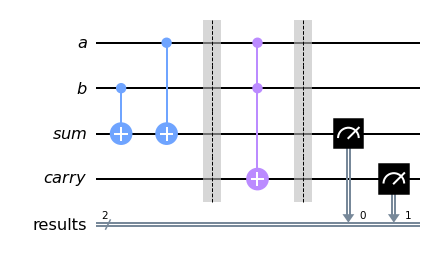

{'00': 1000}

|Sum Carry> = |00> 


In [4]:
from sympy.sets import fancysets
#Define registers and a quantum circuit
q_a = QuantumRegister(1, "a")
q_b = QuantumRegister(1, "b")
q_sum = QuantumRegister(1, "sum")
q_carry = QuantumRegister(1, "carry")
c = ClassicalRegister(2, "results")
qc = QuantumCircuit(q_a, q_b, q_sum, q_carry, c)

#XOR
qc.cx(q_b, q_sum)
qc.cx(q_a, q_sum)

qc.barrier()

#AND
qc.ccx(q_a, q_b, q_carry)

qc.barrier()

#Sum
qc.measure(q_sum, c[0])
#Carry out
qc.measure(q_carry, c[1])

display(qc.draw(output="mpl"))

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()
count =result.get_counts()
print(count)

fancy_output = "|Sum Carry> = "
for k in count.keys():
    fancy_output += "|" + str(k[::-1]) + "> + "
print()
print(fancy_output[:-2])


Note that the half-adder above stores the solution on a separate qubit. We can think of this operation as `A + B`. 

Next, we will see that we can also implement in-place addition, `B+=A`. Fortunately, this can be done with the following circuit. 

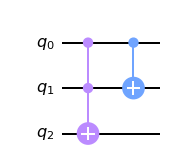

In [7]:
qc = QuantumCircuit(3)
qc.ccx(0,1,2)
qc.cx(0,1)

qc.draw(output='mpl')

One can verify that if $\ket{q_0}$ and $\ket{q_1}$ are the digits being added, then on $\ket{q_1}$ we will have the sum bit $\Sigma$, and on $\ket{q_2}$ we will obtain the carry bit $C_{\rm out}$.

<table>
     <tr>
        <td colspan="3" align="center"> Input </td>
         <td> &nbsp; </td>
        <td colspan="3" align="center"> Output </td>
    </tr>
    <tr>
        <td> $q_0$ </td>
        <td> $q_1$ </td>
        <td> $q_2$</td>
        <td> &nbsp; </td>
        <td> $q_0$ </td>
        <td> $q_1$ </td>
        <td> $q_2$</td>
    </tr>
    <tr>
        <td> 0 </td>
        <td> 0 </td>
        <td> 0 </td>
        <td> &nbsp; </td>
        <td> 0 </td>
        <td> 0 </td>
        <td> 0 </td>
    </tr>
    <tr>
        <td> 0 </td>
        <td> 1 </td>
        <td> 0 </td>
        <td> &nbsp; </td>
        <td> 0 </td>
        <td> 1 </td>
        <td> 0 </td>
    </tr>
    <tr>
        <td> 1 </td>
        <td> 0 </td>
        <td> 0 </td>
        <td> &nbsp; </td>
        <td> 1 </td>
        <td> 1 </td>
        <td> 0 </td>
    </tr>
    <tr>
        <td> 1 </td>
        <td> 1 </td>
        <td> 0 </td>
        <td> &nbsp; </td>
        <td> 1 </td>
        <td> 0 </td>
        <td> 1 </td>
    </tr>
</table>


What happens if the qubit $\ket{q_2}$ is originally in state $\ket{1}$? Let's check the following table.

<table>
        <tr>
        <td colspan="3" align="center"> Input </td>
         <td> &nbsp; </td>
        <td colspan="3" align="center"> Output </td>
    </tr>
    <tr>
        <td> $q_0$ </td>
        <td> $q_1$ </td>
        <td> $q_2$</td>
        <td> &nbsp; </td>
        <td> $q_0$ </td>
        <td> $q_1$ </td>
        <td> $q_2$</td>
    </tr>
    <tr>
        <td> 0 </td>
        <td> 0 </td>
        <td> 1 </td>
        <td> &nbsp; </td>
        <td> 0 </td>
        <td> 0 </td>
        <td> 1 </td>
    </tr>
    <tr>
        <td> 0 </td>
        <td> 1 </td>
        <td> 1 </td>
        <td> &nbsp; </td>
        <td> 0 </td>
        <td> 1 </td>
        <td> 1 </td>
    </tr>
    <tr>
        <td> 1 </td>
        <td> 0 </td>
        <td> 1 </td>
        <td> &nbsp; </td>
        <td> 1 </td>
        <td> 1 </td>
        <td> 1 </td>
    </tr>
    <tr>
        <td> 1 </td>
        <td> 1 </td>
        <td> 1 </td>
        <td> &nbsp; </td>
        <td> 1 </td>
        <td> 0 </td>
        <td> 0 </td>
    </tr>
</table>

We see that, unless all $ q_0 $, $ q_1 $, and $ q_2 $ are in states $ \ket{1} $ at the same time,  we can use this circuit to add the single bit stored in qubit $ q_0 $ to the number stored on 2 qubits $q_1$ and $q_2$.

## Counting

Suppose that we are given $n$ bits and we are asked how many of the bits are set to 1. At this point, we know how to add two bits and now we will implement the procedure for counting by adding multiple bits consecutively on top of each other. 

We will store the output in qubits $\ket{q_2}$ and $\ket{q_3}$ where $\ket{q_2}$ represents the sum and $\ket{q_3}$ represents the carry. We will perform in place addition, meaning that we will first add the bit represented by $\ket{q_0}$ to the output and then do the same for the bit stored in $\ket{q_1}$.

In summary, we will perform the following operations: (`sum` is representing the sum stored in qubits $\ket{q_2}$ and $\ket{q_3}$.)

First, we do `sum = sum + q0` 

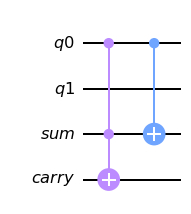

In [19]:
q0 = QuantumRegister(1, "q0")
q1 = QuantumRegister(1, "q1")
q2 = QuantumRegister(1, "sum")
q3 = QuantumRegister(1, "carry")

qc = QuantumCircuit(q0, q1, q2, q3)

qc.ccx(0,2,3)
qc.cx(0,2)
qc.draw(output="mpl")


Remark that initially $ \ket{q_2} $ is in state 0, and so we can also omit CCX.

After the first addition, $\ket{q_2}$ either stores 0 or 1. Now let's add the bit stored in $\ket{q_1}$ to the output.

Second, we do `sum = sum + q1`

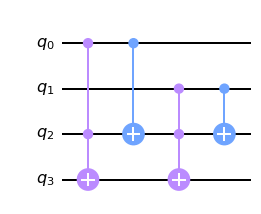

In [20]:
qc = QuantumCircuit(4)

qc.ccx(0,2,3)
qc.cx(0,2)

qc.ccx(1,2,3)
qc.cx(1,2)

qc.draw(output="mpl")

Now let's check the correctness of the above circuit by trying different inputs.

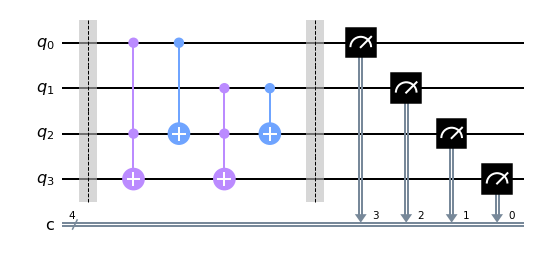

Input: 00
The sum should be equal to 0
According to quantum circuit: 0



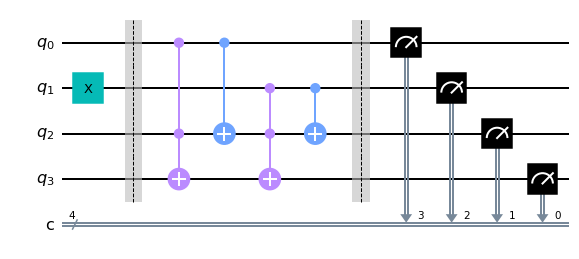

Input: 01
The sum should be equal to 1
According to quantum circuit: 1



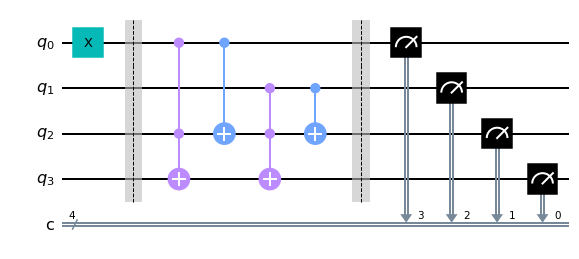

Input: 10
The sum should be equal to 1
According to quantum circuit: 1



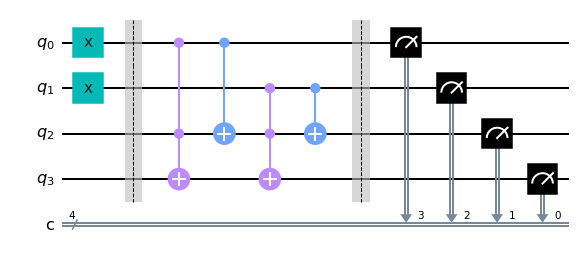

Input: 11
The sum should be equal to 2
According to quantum circuit: 2



In [2]:
for input in ['00','01','10','11']:
    qc = QuantumCircuit(4,4)

    # initialization
    if input[0] == '1':
        qc.x(0)
    if input[1] == '1':
        qc.x(1)

    qc.barrier()

    # add qubit 0 
    # qubits 2. and 3. store the sum 
    qc.ccx(0,2,3) # since we know that q[2] is set to zero initially, we could omit this control 
    qc.cx(0,2)
    
    ## add qubit 1
    qc.ccx(1,2,3)
    qc.cx(1,2)

    qc.barrier()

    #Measure in reverse order
    for i in range(4):
        qc.measure(i,3-i)
    display(qc.draw(output="mpl"))

    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
    counts = job.result().get_counts(qc)   
    # print the sum
    print("Input:", input)
    print("The sum should be equal to", int(input[0])+int(input[1]))
    print("According to quantum circuit:", 2*int(list(counts.keys())[0][3]) + int(list(counts.keys())[0][2])) 
    print("")

In the next task, you will implement the same procedure this time adding the first three bits. The sum will be stored in qubits $\ket{q_3}$ and $\ket{q_4}$. After adding the first two bits, it can be the case that $\ket{q_3}$ stores 0 and $\ket{q_4}$ stores 1, corresponding to the sum $2=10_2$.  From the table, we know that the same implementation idea still works independent of whether $\ket{q_4}$ stores 1 or not.

### Task 1
Add the first three bits stored in qubits 0-2 and store the sum on qubits 3-4.

In [ ]:
for input in  ['000','001','010','011','100','101','110','111']:
    qc = QuantumCircuit(5,5)

    if input[0] == '1':
        qc.x(0)
    if input[1] == '1':
        qc.x(1)
    if input[2] == '1':
        qc.x(2)
    qc.barrier()

    # your solution here
    #
    #
    qc.ccx(0,3,4)
    qc.cx(0,3)

    qc.ccx(1,3,4)
    qc.cx(1,3)

    qc.ccx(2,3,4)
    qc.cx(2,3)
    
    qc.barrier()
    #Measure in reverse order
    for i in range(5):
        qc.measure(i,4-i)

    display(qc.draw(output="mpl"))

    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
    counts = job.result().get_counts(qc)   
    # print the sum
    print("Input:", input)
    print("The sum should be equal to", int(input[0])+int(input[1])+int(input[2]))
    print("According to quantum circuit:", 2*int(list(counts.keys())[0][4]) + int(list(counts.keys())[0][3])) 
    print("")

[click for our solution](Adder_and_counting_solutions.ipynb#task1)

### Generalization  

Check the following circuit which implements summation of the first four bits. When we add the fourth bit, we introduce the multi-controlled $NOT$ as it is possible that the sum is equal to 3 at this point and an overflow takes place. We store the output in qubits $\ket{q_4}, \ket{q_5}$ and $\ket{q_6}$.

The line below generates all possible inputs of length 4 and we will use it in our code.

In [8]:
input_list = [bin(i)[2:].zfill(4) for i in range(0,2**4)]
print(input_list)


['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']


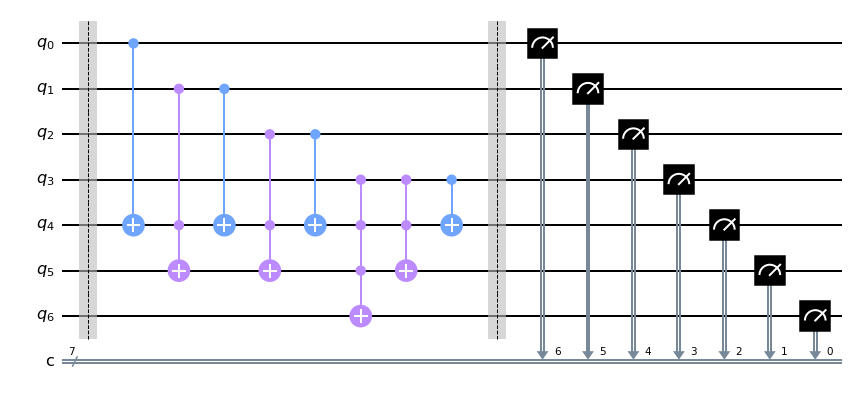

Input: 0000
The sum should be equal to 0
According to quantum circuit: 0



In [5]:
for input in input_list:
    qc = QuantumCircuit(7,7)

    #We can do the initialization inside a for loop
    for i in range(4):
        if input[i]=='1':
            qc.x(i)

    qc.barrier()

    # add qubit 0
    qc.ccx(0,4,5)
    qc.cx(0,4)

    # add qubit 1
    qc.ccx(1,4,5)
    qc.cx(1,4)

    # add qubit 2
    qc.ccx(2,4,5)
    qc.cx(2,4)

    # add qubit 3
    qc.mct([3,4,5],6)
    qc.ccx(3,4,5)
    qc.cx(3,4)
    
    qc.barrier()

    #Measure in reverse order
    for i in range(7):
        qc.measure(i,6-i)

    display(qc.draw(output="mpl"))

    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
    counts = job.result().get_counts(qc)   
    # print the sum
    print("Input:", input)
    print("The sum should be equal to",  int(input[0])+int(input[1])+int(input[2])+int(input[3]))
    print("According to quantum circuit:",4*int(list(counts.keys())[0][6])+ 2*int(list(counts.keys())[0][5]) + int(list(counts.keys())[0][4])) 
    print("")

    break
    

The same pattern will continue if we include the bits $ a_5, a_6, a_7 $. As the sum will be at most 7, we use still 3 bits for storing the output (summation).

After including $ a_8 $, we can have an overflow and so we use a multi-controlled not gate to check it. Besides, we use 4 bits for storing the output, which will be enough when adding $ a_9,\dots,a_{15} $.

This pattern repeats itself whenever including the new bits. A new (qu)bit is used by the output when the $ 2^i $-th bit is included in the summation, and a new multi-controlled not gate should be used to check the overflow.

---

Let's review the whole process from the beginning.

There is a single input (qu)bit $a_0$ and a single output qubit, say $b_4$, initially set to $0$.  After the operation $b_4 = b_4+a_0 $, $ b_4 $ can be at most 1, which can be accomplished by using a single $CX$ operator.


In [ ]:
qc = QuantumCircuit(7,7)

# add qubit 0
qc.cx(0,4)
qc.draw(output="mpl")

Now we add one more bit ($a_1$) to the summation. At this point, $b_4$ can be 0 or 1. If $a_1=1$ and $b_4=1$, then there will be an overflow to the next qubit since the sum will be $2=10_2$. We can check this using a $CCX$ gate where $a_1$ and $b_4$ are the control and $b_4$ is the target (qu)bit. (The same as the half adder above.)

Similarly, we can add $a_2$. If $a_2=1$ and the current sum is 1, then the new sum will be equal to 2 and the overflow will take place. If the current sum is equal to 2, then there is already an overflow and the new sum will become $3=11_2$.

In [ ]:
qc = QuantumCircuit(7,7)

# add qubit 0
qc.cx(0,4)

# add qubit 1
qc.ccx(1,4,5)
qc.cx(1,4)

# add qubit 2
qc.ccx(2,4,5)
qc.cx(2,4)
    
qc.draw(output="mpl")

Now we will add one more bit $a_3$. If $a_3= 1$ and both $b_4$ and $b_5$ are equal to 1, that is if the current sum is 3, then the sum will become 4 and we need an additional bit $b_6$. Hence, we need to check $a_3$, $b_4$, $b_5$ for equality to 1 and apply a $NOT$ gate to $\ket{b_6}$ if this is the case. 

In [ ]:
qc = QuantumCircuit(7,7)

# add qubit 0
qc.cx(0,4)

# add qubit 1
qc.ccx(1,4,5)
qc.cx(1,4)

# add qubit 2
qc.ccx(2,4,5)
qc.cx(2,4)

# add qubit 3
qc.mct([3,4,5],6)
qc.ccx(3,4,5)
qc.cx(3,4)
    
qc.draw(output="mpl")

### Task 2

By using the given idea, add the values of seven bits, namely $ q_0,\ldots,q_6 $, and write the results on the qubits $ q_7,q_8, q_9 $.

*Note:*  You may use for-loops instead of adding each qubit one by one.

In [7]:
# Generate the inputs
input_list = [bin(i)[2:].zfill(7) for i in range(0,2**7)]
print(input_list)

['0000000', '0000001', '0000010', '0000011', '0000100', '0000101', '0000110', '0000111', '0001000', '0001001', '0001010', '0001011', '0001100', '0001101', '0001110', '0001111', '0010000', '0010001', '0010010', '0010011', '0010100', '0010101', '0010110', '0010111', '0011000', '0011001', '0011010', '0011011', '0011100', '0011101', '0011110', '0011111', '0100000', '0100001', '0100010', '0100011', '0100100', '0100101', '0100110', '0100111', '0101000', '0101001', '0101010', '0101011', '0101100', '0101101', '0101110', '0101111', '0110000', '0110001', '0110010', '0110011', '0110100', '0110101', '0110110', '0110111', '0111000', '0111001', '0111010', '0111011', '0111100', '0111101', '0111110', '0111111', '1000000', '1000001', '1000010', '1000011', '1000100', '1000101', '1000110', '1000111', '1001000', '1001001', '1001010', '1001011', '1001100', '1001101', '1001110', '1001111', '1010000', '1010001', '1010010', '1010011', '1010100', '1010101', '1010110', '1010111', '1011000', '1011001', '1011010'

In [ ]:
for input in input_list:
    qc = QuantumCircuit(10,10)

    #We can do the initialization inside a for loop
    for i in range(7):
        if input[i]=='1':
            qc.x(i)

    #
    #Your code here
    #
    
    #Measure in reverse order
    for i in range(10):
        qc.measure(i,9-i)

    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
    counts = job.result().get_counts(qc)   
    # print the sum
    print("Input:", input)
    print("The sum should be equal to",  sum(int(i) for i in input))
    print("According to quantum circuit:",4*int(list(counts.keys())[0][9])+ 2*int(list(counts.keys())[0][8]) + int(list(counts.keys())[0][7])) 
    print("")
    

[click for our solution](Adder_and_counting_solutions.ipynb#task2)

## IMPORTANT: How to calculate Quantum Costs using an Unroller
There are several ways to evaluate a program (quantum circuit). Such as:

1. Number of quantum bits
2. Depth
3. Program Execution Speed (Runtime)
4. Number of instructions

These are all important measurements that impact the results and throughput of quantum computation.

Any given quantum circuit can be decomposed into single-qubit gates (an instruction given to a single qubit) and two-qubit gates. With the current Noisy Intermediate-Scale Quantum (NISQ) devices, noises are introduced more heavily when implementing CX gates.

Let's check the following example.

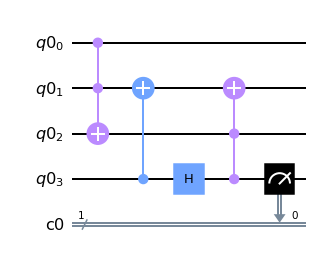

In [8]:
q = QuantumRegister(4, 'q0')
c = ClassicalRegister(1, 'c0')
qc = QuantumCircuit(q, c)
qc.ccx(q[0], q[1], q[2])
qc.cx(q[3], q[1])
qc.h(q[3])
qc.ccx(q[3], q[2], q[1])
qc.measure(q[3],c[0])
qc.draw(output='mpl')

You can use the following function to count the number of operations in the circuit.

In [9]:
qc.count_ops()

OrderedDict([('ccx', 2), ('cx', 1), ('h', 1), ('measure', 1)])

As you can see, this quantum circuit contains a Hadamard gate, a CX gate and CCX gates. 

By using qiskit transpiler, we can decompose the circuit into an equivalent one using only a 1-qubit gate called `u`-gate and CNOT gate.

In [10]:
from qiskit import transpile

tp = transpile(qc, basis_gates = ['cx', 'u'])
print(tp.count_ops())


OrderedDict([('u', 17), ('cx', 13), ('measure', 1)])


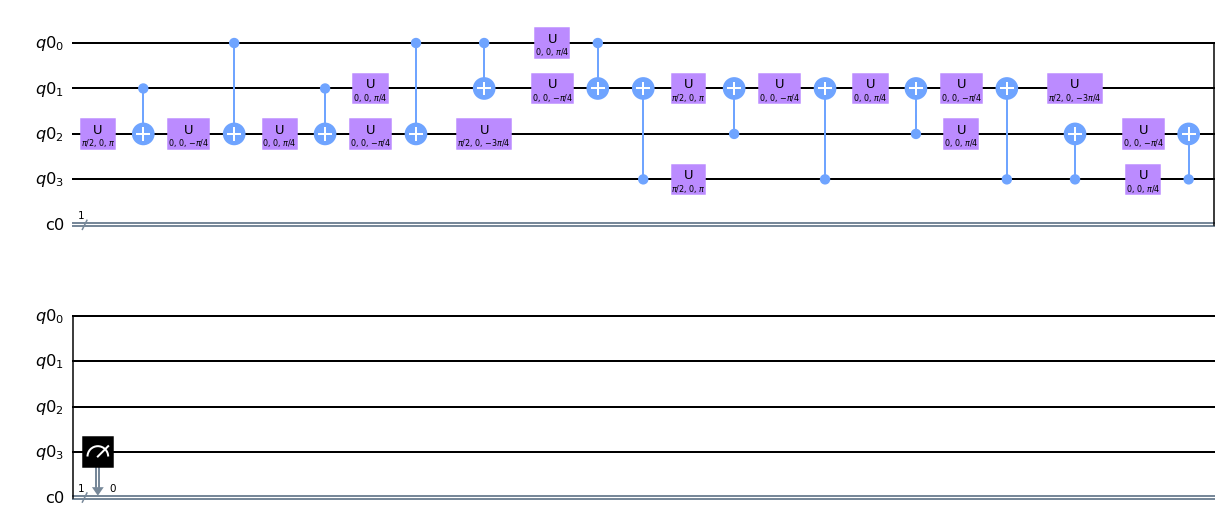

In [11]:
tp.draw(output='mpl')

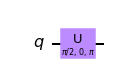

In [12]:
qcm = QuantumCircuit(1)
qcm.h(0)
tpm = transpile(qcm, basis_gates=["u"])
tpm.draw(output="mpl")
